## **Importing Required Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px
from tqdm import tqdm
from tabulate import tabulate
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score



## **Dataset Loading & it's basic description**

In [4]:
df=pd.read_csv("dataset.csv")
#df.sample(5)

**Checking Null Values in Dataset**

In [5]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
track_genre         1
dtype: int64

In [6]:
# Dropping rows with missing values (NaN/null) from the DataFrame
df=df.dropna()

In [7]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101010 entries, 0 to 101010
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        101010 non-null  int64  
 1   track_id          101010 non-null  object 
 2   artists           101010 non-null  object 
 3   album_name        101010 non-null  object 
 4   track_name        101010 non-null  object 
 5   popularity        101010 non-null  int64  
 6   duration_ms       101010 non-null  int64  
 7   explicit          101010 non-null  bool   
 8   danceability      101010 non-null  float64
 9   energy            101010 non-null  float64
 10  key               101010 non-null  int64  
 11  loudness          101010 non-null  float64
 12  mode              101010 non-null  int64  
 13  speechiness       101010 non-null  float64
 14  acousticness      101010 non-null  float64
 15  instrumentalness  101010 non-null  float64
 16  liveness          10

In [9]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,101010.000000,101010.000000,1.010100e+05,101010.000000,101010.000000,101010.000000,101010.000000,101010.000000,101010.000000,101010.000000,101010.000000,101010.000000,101010.000000,101010.000000,101010.000000
mean,50504.847589,33.119196,2.278243e+05,0.567419,0.649682,5.314137,-8.067770,0.641065,0.086478,0.309000,0.143632,0.214346,0.481182,122.679229,3.910276
std,29159.612465,22.554619,1.065135e+05,0.172055,0.249943,3.556321,4.873953,0.479690,0.109193,0.330004,0.298467,0.190289,0.257757,29.800901,0.407654
min,0.000000,0.000000,8.586000e+03,0.000000,0.000020,0.000000,-43.957000,0.000000,0.000000,0.000000,0.000000,0.009250,0.000000,0.000000,0.000000
25%,25252.250000,16.000000,1.745262e+05,0.455000,0.484000,2.000000,-9.821750,0.000000,0.036100,0.015500,0.000000,0.097800,0.268000,99.762000,4.000000
50%,50504.500000,34.000000,2.130745e+05,0.579000,0.695000,5.000000,-6.830000,1.000000,0.049500,0.161000,0.000032,0.133000,0.473000,122.062000,4.000000
75%,75757.750000,50.000000,2.614000e+05,0.695000,0.859000,8.000000,-4.872000,1.000000,0.086700,0.584000,0.029200,0.277000,0.689000,140.975500,4.000000
max,101010.000000,100.000000,5.237295e+06,0.984000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,0.999000,1.000000,0.995000,243.372000,5.000000


In [10]:
df.shape

(101010, 21)

## **Dropping few Columns**

In [11]:
# List the columns you want to drop
columns_to_drop = ['Unnamed: 0', 'track_id','liveness']

# Drop the specified columns
df.drop(columns_to_drop, axis=1, inplace=True)
df.head(5)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.715,87.917,4.0,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.267,77.489,4.0,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.120,76.332,4.0,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.143,181.740,3.0,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.167,119.949,4.0,acoustic


## **Data Visualization**

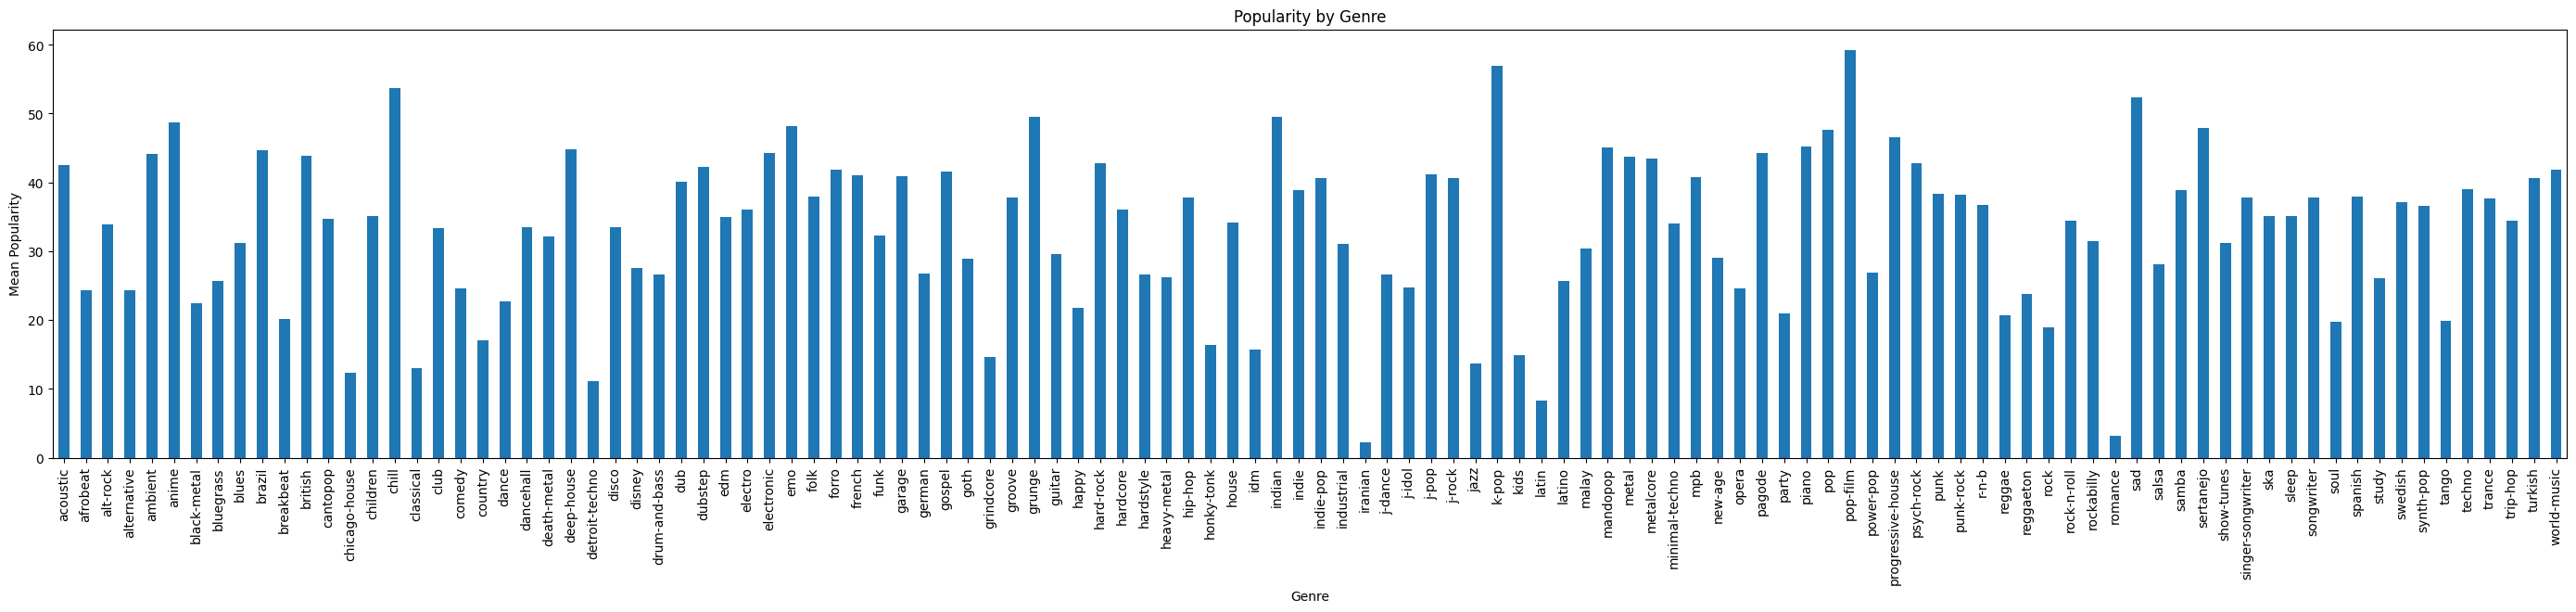

In [ ]:
#Popularity by Genre Bar chart

plt.figure(figsize=(35, 6))
genre_popularity = df.groupby('track_genre')['popularity'].mean()
genre_popularity.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.title('Popularity by Genre')
plt.show()


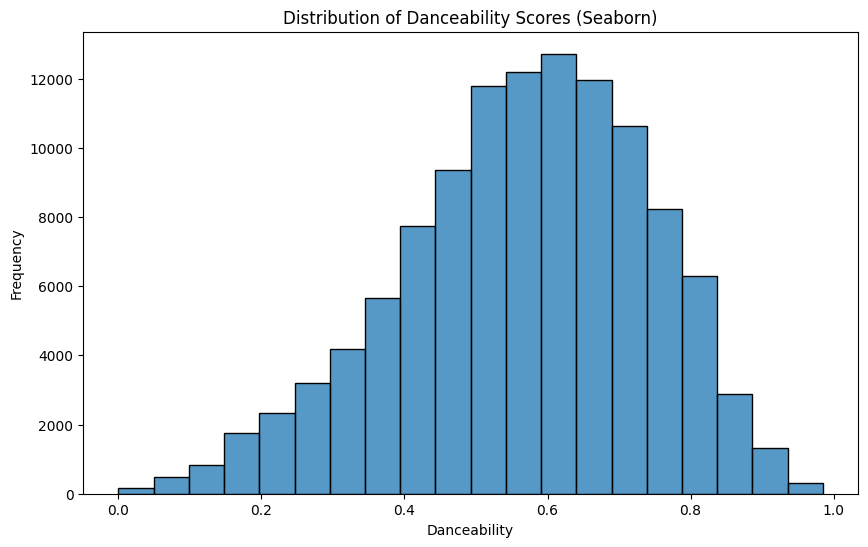

In [ ]:
#Histogram of Danceability Scores

plt.figure(figsize=(10, 6))
sns.histplot(df['danceability'], bins=20)
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability Scores (Seaborn)')
plt.show()

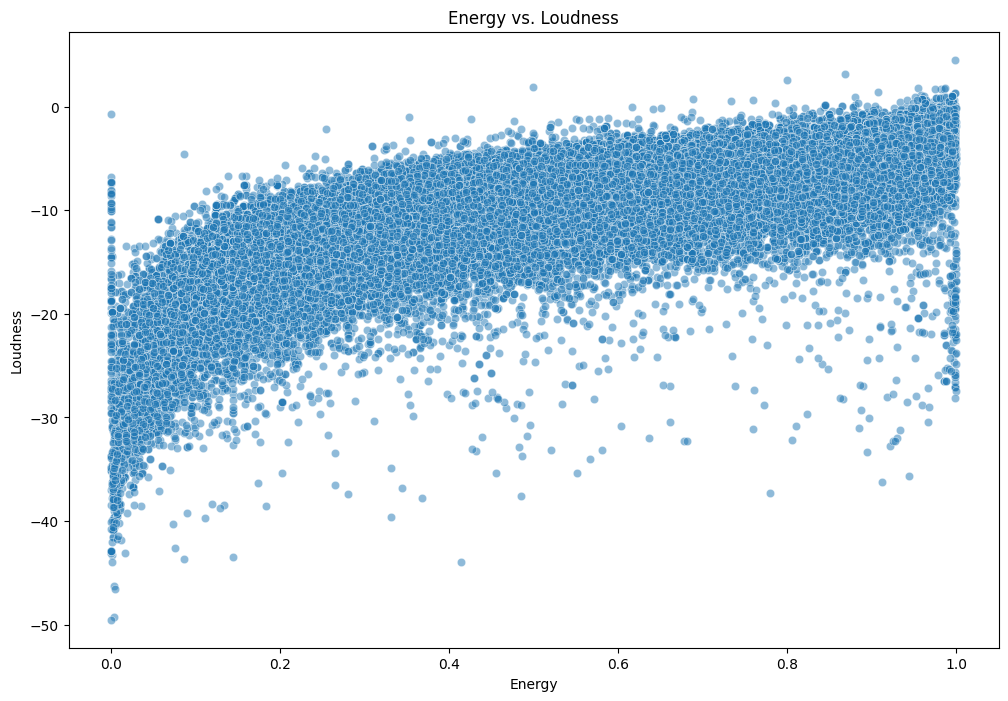

In [ ]:
#Scatter plot of Energy vs Loudness

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='energy', y='loudness', alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Energy vs. Loudness')
plt.show()

<Figure size 1400x600 with 0 Axes>

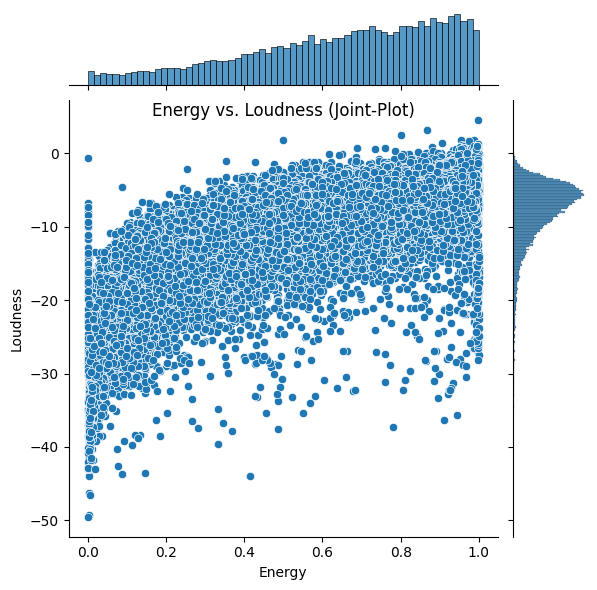

In [ ]:
#Joint Plot of ENergy vs Loudness

#Scatter Plot in Center

#The distribution plots on the top and right sides show the individual distributions of 'Energy' and 'Loudness', respectively.
#These histograms represent the frequency or density of each variable's values. The bars indicate how many tracks fall into specific ranges of 'Energy' and 'Loudness'.

plt.figure(figsize=(14, 6))
sns.jointplot(x='energy', y='loudness', data=df, kind='scatter')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Energy vs. Loudness (Joint-Plot)', y=0.945)  # Adjust the y position for the title
plt.show()


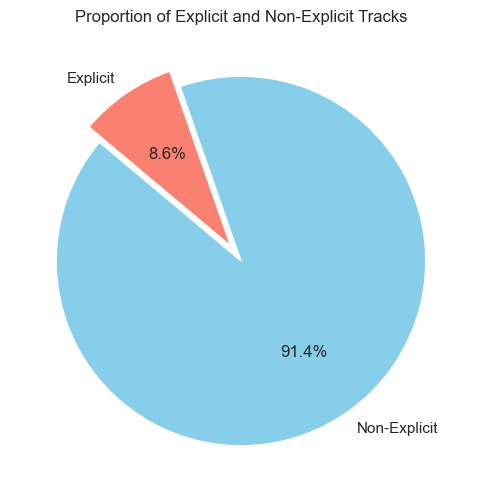

In [ ]:
#Proportion of Explicit and Non-Explicit Tracks
# Explicit -  contain explicit or potentially offensive content
# Non explicit - non-explicit tracks contain clean or censored content


sns.set(style='whitegrid')
explicit_counts = df['explicit'].value_counts()
explode = (0, 0.1)  # Explode the second slice (explicit)
plt.figure(figsize=(6, 6))
plt.pie(explicit_counts, labels=['Non-Explicit', 'Explicit'], autopct='%1.1f%%', explode=explode, startangle=140, colors=['skyblue', 'salmon'])
plt.title('Proportion of Explicit and Non-Explicit Tracks')
plt.show()

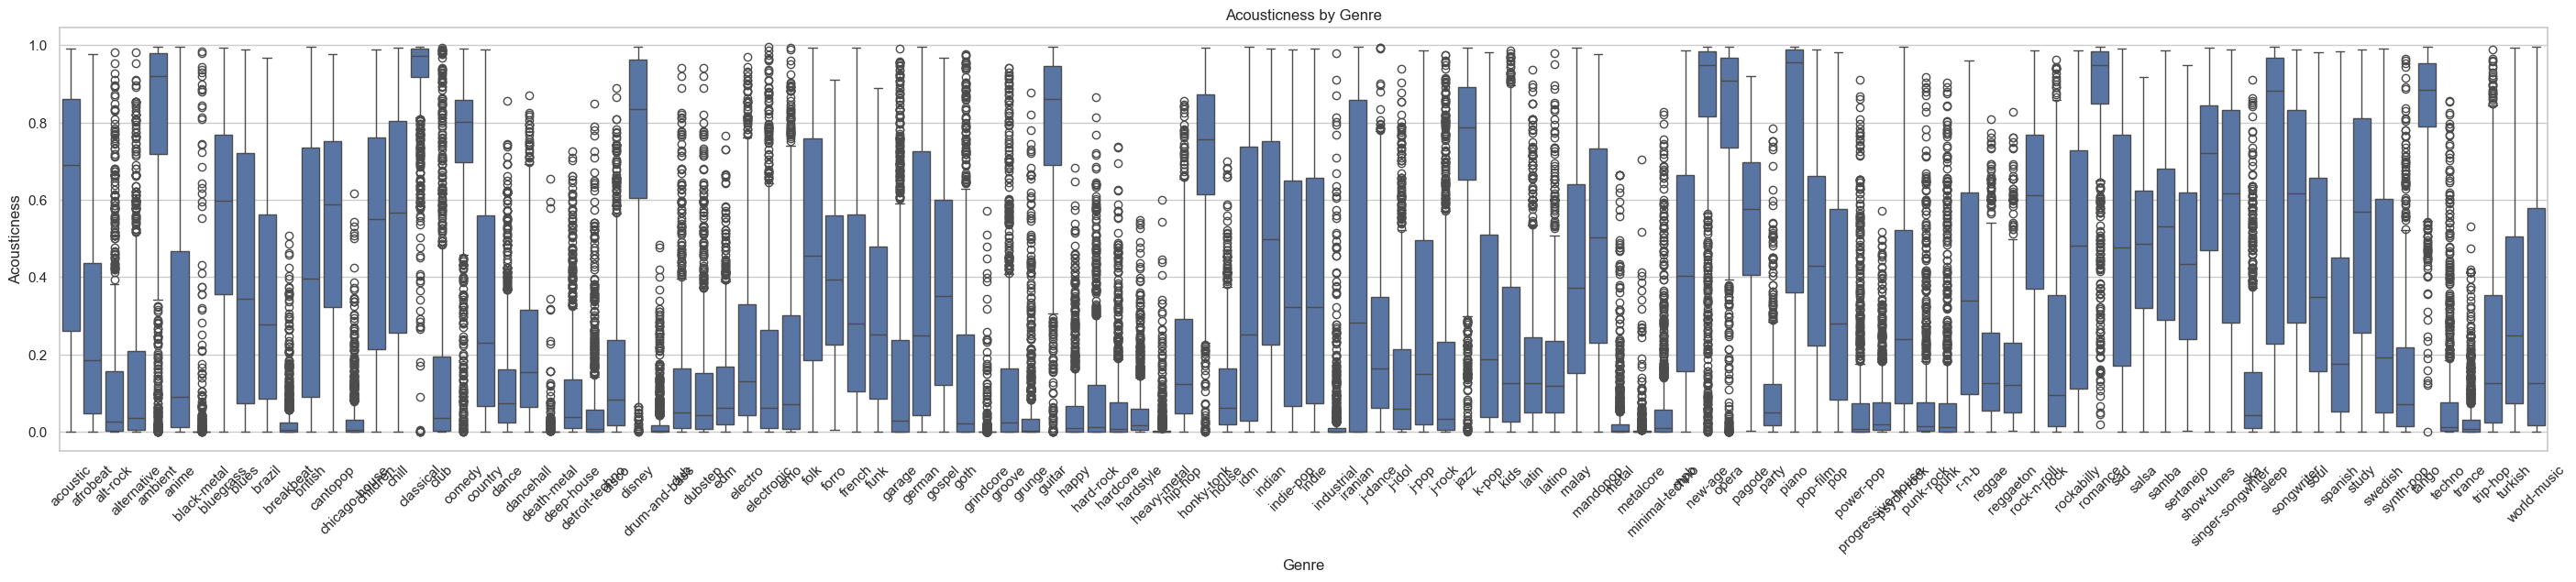

In [ ]:
#Boxplot for Acoustiness by Genre
#Acoustiness - Recorded using real instruments rather then electronicaslly
plt.figure(figsize=(35, 6))

sns.boxplot(x='track_genre', y='acousticness', data=df)
plt.xlabel('Genre')
plt.ylabel('Acousticness')
plt.title('Acousticness by Genre')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# #orrelation Heatmap: You can create a heatmap to visualize the correlation between numerical features like danceability, energy, loudness, and others.
# # This can help you understand how features relate to each other
# correlation_matrix = df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()


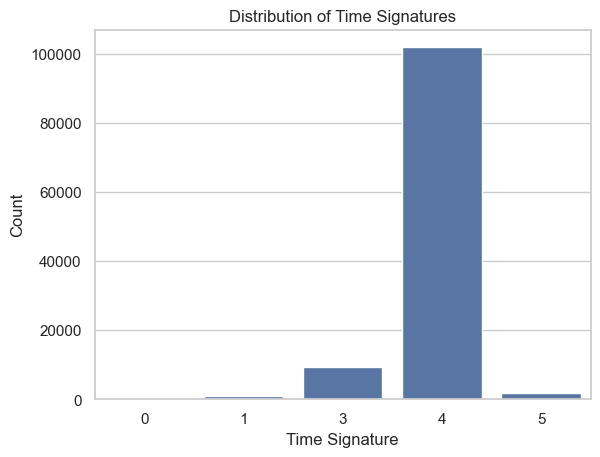

In [ ]:
#Countplot for Time Signatures: You can create a countplot to visualize the distribution of time signatures in the dataset.
sns.countplot(x='time_signature', data=df)
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.title('Distribution of Time Signatures')
plt.show()

C:\Users\nikun\AppData\Local\Temp\ipykernel_21040\3794404309.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_popularity.values, y=artist_popularity.index, palette="viridis")


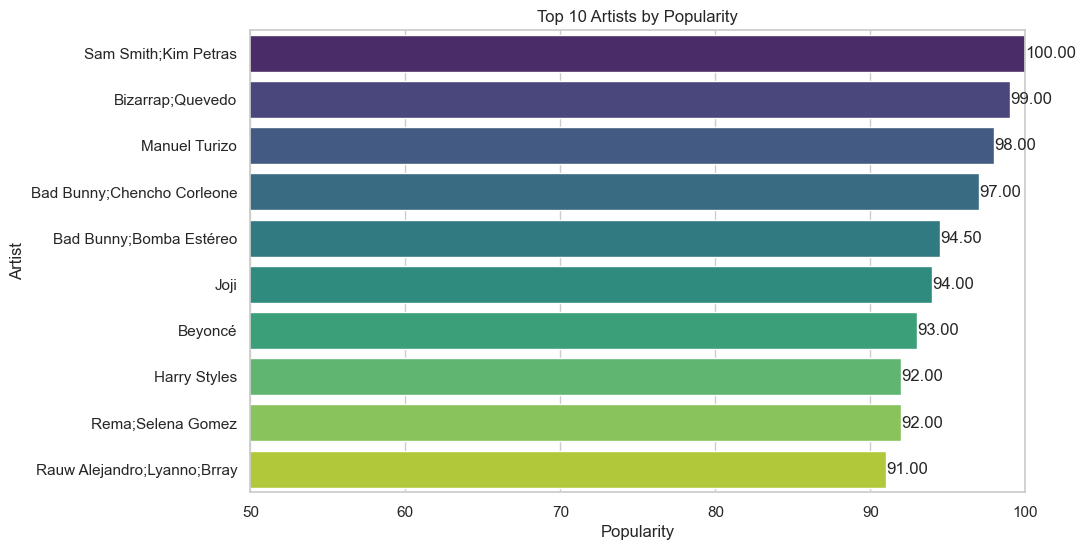

In [ ]:
# Bar Chart for Artist Popularity: Visualize the average popularity of tracks by each artist.


# Set Seaborn style
artist_popularity = df.groupby('artists')['popularity'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_popularity.values, y=artist_popularity.index, palette="viridis")

for index, value in enumerate(artist_popularity):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')

plt.xlim(50, 100)  # Setting x-axis limits from 50 to 100
plt.xlabel('Popularity')
plt.ylabel('Artist')
plt.title('Top 10 Artists by Popularity')
plt.show()

# **Content Based Filtering and Recommendation**

# **Recommendation system using TF-IDF and cosine similarity**

In [ ]:
# Keep only the first 40000 instances - Data Preparation
df = df.head(40000)

# Drop unnecessary columns
columns_to_drop = ['key', 'time_signature']
df = df.drop(columns=columns_to_drop)

# Encode categorical features (explicit)
df['explicit'] = df['explicit'].astype(int)

# Combine text and numerical features for TF-IDF vectorization
df['text_features'] = (
    df['artists'] + ' ' + df['album_name'] + ' ' + df['track_name'] + ' ' +
    df['track_genre'] + ' ' + df['danceability'].astype(str) + ' ' +
    df['energy'].astype(str) + ' ' + df['loudness'].astype(str) + ' ' +
    df['popularity'].astype(str) + ' ' + df['duration_ms'].astype(str) + ' ' +
    df['valence'].astype(str)
)

# Use TF-IDF to convert text features into numerical vectors with reduced features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_features'])

# Convert the TF-IDF matrix to a sparse matrix
tfidf_sparse = csr_matrix(tfidf_matrix)

# Use cosine_similarity from sklearn with sparse matrices
cosine_sim_sparse = cosine_similarity(tfidf_sparse, tfidf_sparse)

def recommend(track_name, cosine_sim=cosine_sim_sparse, df=df):
    idx = df.index[df['track_name'] == track_name].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Get top 5 recommendations
    track_indices = [i[0] for i in sim_scores]
    return df['track_name'].iloc[track_indices]

# Example recommendation
track_to_recommend = 'Hold On'
recommended_tracks = recommend(track_to_recommend)
print(f"Recommendations for '{track_to_recommend}':\n{recommended_tracks}")


Recommendations for 'Hold On':
954                  Hold On
325       Hold On - Acoustic
14           Hold On - Remix
21419    Hold You - Hold Yuh
15964                   Hold
Name: track_name, dtype: object


In [ ]:

# True values for evaluation (ground truth)
true_values = ['Just Hold On', 'Hold on to Me', 'Hold On', 'Hold On - Acoustic', 'Hold On - Remix']

# Predictions from the recommend function
predicted_values = recommend('Hold On')

# Accuracy
accuracy = accuracy_score(true_values, predicted_values)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(true_values, predicted_values)
print(f"Confusion Matrix:\n{conf_matrix}")

# Precision, Recall, F1-Score
precision = precision_score(true_values, predicted_values, average='macro')
recall = recall_score(true_values, predicted_values, average='macro')
f1 = f1_score(true_values, predicted_values, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.0
Confusion Matrix:
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]]
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **User Input for Recommendation for TF IDF and Cosine Similarity**

In [ ]:
track_to_recommend = 'Hikare Inochi'
recommended_tracks = recommend(track_to_recommend)
print(f"Recommendations for '{track_to_recommend}':\n{recommended_tracks}")

Recommendations for 'Hikare Inochi':
311                 Hikare Inochi
650                     いきのこり●ぼくら
414          As It Was - Acoustic
33610                   not alone
101      Somebody Else - Acoustic
Name: track_name, dtype: object


**Word cloud for for representation of most repeated words**

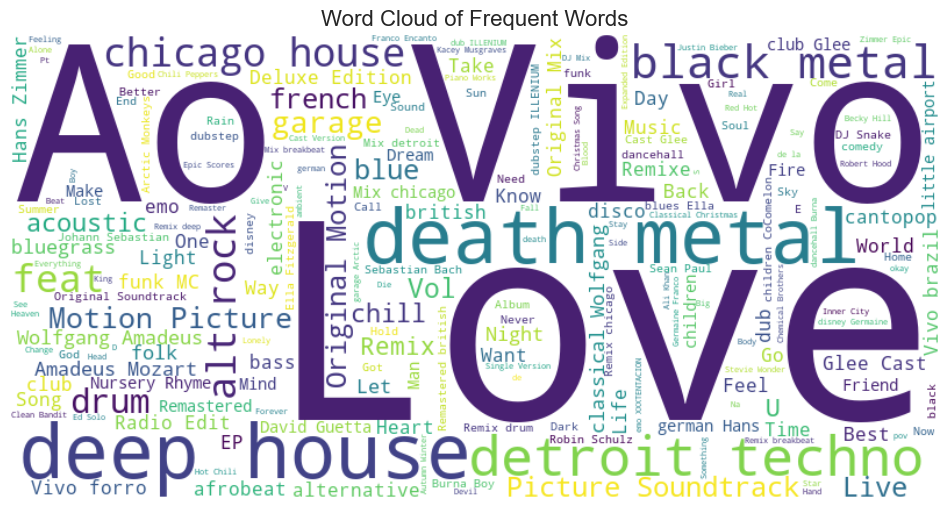

In [ ]:
# most frequent words in these fields
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white',colormap='viridis', contour_color='black', contour_width=2, random_state=42).generate(' '.join(df['text_features']))

# Display the generated word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Words', fontsize=16)
plt.show()

# **Recomendation system using K-Means Clustering**

In [15]:
# Keep only the first 10,000 instances
df_subset = df.head(10000)

# Select numerical columns for clustering
numerical_columns = df_subset.select_dtypes(include=['int', 'float']).columns
features_for_clustering = df_subset[numerical_columns]

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_for_clustering)

# Set the number of clusters (you can adjust this based on your preference)
num_clusters = 10

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_subset['cluster'] = kmeans.fit_predict(normalized_features)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=3)  # Change to 2 for 2D visualization
reduced_features = pca.fit_transform(normalized_features)


# Function to get recommendations from a specific cluster
def get_cluster_recommendations(track_name, df_subset, amount=5):
    track_cluster = df_subset[df_subset['track_name'] == track_name]['cluster'].iloc[0]
    cluster_df = df_subset[df_subset['cluster'] == track_cluster]
    recommendations = cluster_df.sample(min(amount, len(cluster_df)))
    return recommendations[['artists', 'track_name']]

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# **SHAP**

  0%|          | 0/10000 [00:00<?, ?it/s]

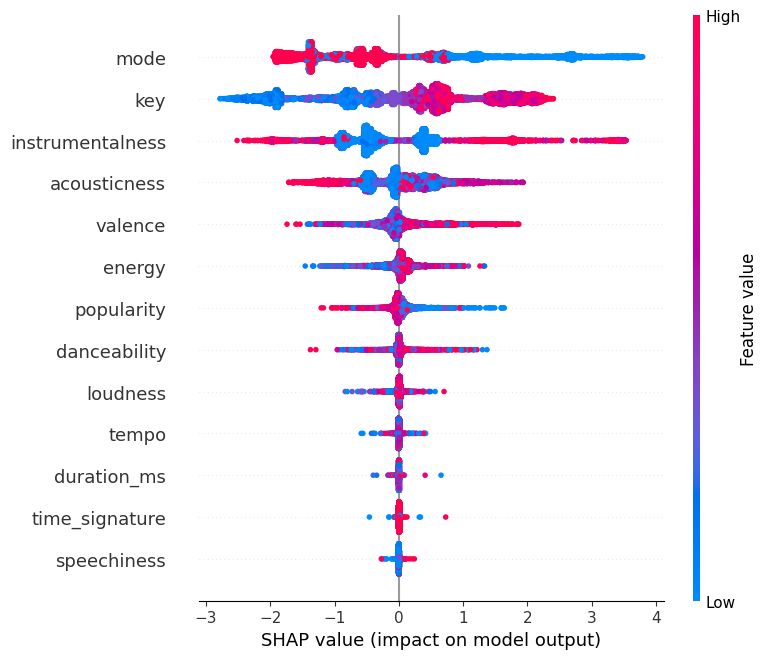

In [16]:
import shap

# Prepare the KMeans explainer
explainer = shap.KernelExplainer(kmeans.predict, shap.sample(normalized_features, 100))

# Explain the predictions (cluster assignments) for the entire dataset
shap_values = explainer.shap_values(normalized_features)

# Summary plot
shap.summary_plot(shap_values, normalized_features, feature_names=features_for_clustering.columns)

# **User Input for Recommendation using K Means Clustering**

In [ ]:
# Example usage
track_to_recommend = 'Hikare Inochi'  # Replace with the track name you want recommendations for
track_recommendations = get_cluster_recommendations(track_to_recommend, df_subset, amount=5)
display(track_recommendations)

,artists,track_name
32458,HOSH;1979;Jalja,Midnight (The Hanging Tree)
28419,Hellberg;Aaron Richards,Synchronize - VIP
3554,Layto;Neoni,Ghost Town
28612,ARMNHMR;NURKO;Micah Martin,Won't Make A Sound
3459,Red Hot Chili Peppers,Under the Bridge


**3D plot**

In [ ]:
# # Create a 3D scatter plot using plotly
# fig = px.scatter_3d(df_subset, x=reduced_features[:, 0], y=reduced_features[:, 1], z=reduced_features[:, 2],
#                     color='cluster', symbol='cluster', opacity=0.7,
#                     title='K-Means Clustering Visualization in 3D')

# # Update layout to adjust the size
# fig.update_layout(width=1200, height=800)

# # Show the interactive plot
# fig.show()

# **Recommendation system with a custom distance metric**

In [ ]:
class SpotifyRecommendation:
    def __init__(self, dataset):
        self.dataset = dataset

    def recommend(self, songs, amount=1):
        distance = []
        song_matches = self.dataset[(self.dataset.track_name.str.lower() == songs.lower())]

        if song_matches.empty:
            print(f"No matches found for the song '{songs}'")
            return None

        song = song_matches.head(1).values[0]
        rec = self.dataset[self.dataset.track_name.str.lower() != songs.lower()]

        for s in tqdm(rec.values):
            d = 0
            for col in np.arange(len(rec.columns)):
                if col not in [1, 6, 12, 14, 18]:
                    try:
                        d = d + np.absolute(float(song[col])) - float(s[col])
                    except ValueError:
                        # Handle non-numeric data (e.g., string in 'artists' column)
                        pass
            distance.append(d)

        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ["artists", "track_name"]
        return rec[columns][:amount]


# **User Input for Recommendation with custom Distance Metric**

In [ ]:
# Example: Create SpotifyRecommendation instance and recommend songs similar to "Hold On"
recommendations = SpotifyRecommendation(df)
similar_songs = recommendations.recommend("Hikare Inochi", 5)

# Display the recommendations in table format
display(similar_songs)

  0%|          | 0/39998 [00:00<?, ?it/s]

100%|██████████| 39998/39998 [00:01<00:00, 38077.18it/s]
C:\Users\nikun\AppData\Local\Temp\ipykernel_21040\1218106036.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['distance'] = distance


,artists,track_name
10984,Timo Maas,Crossing Wires 002 - Continuous DJ Mix
10935,Timo Maas,Crossing Wires 002 - Continuous DJ Mix
24348,Seth Troxler,The Lab 03 - Continuous DJ Mix Part 1
13344,Mark Farina,House of Om - Mark Farina - Continuous Mix
13245,Mark Farina,Live In Tokyo - Continuous Mix


# **Mood based Recomendation system**

In [ ]:
# Define mood categories based on valence
def categorize_mood(valence):
    if valence > 0.7:
        return 'Positive'
    elif 0.4 <= valence <= 0.7:
        return 'Neutral'
    else:
        return 'Negative'

# Create a new column 'mood' based on valence
df['mood'] = df['valence'].apply(categorize_mood)

# Function to recommend tracks based on mood
def recommend_by_mood(user_mood, df, amount=5):
    mood_matches = df[df['mood'] == user_mood]

    if mood_matches.empty:
        print(f"No matches found for the mood '{user_mood}'")
        return None

    recommendations = mood_matches.sample(min(amount, len(mood_matches)))
    return recommendations[['artists', 'track_name', 'valence']]



# **User Input for Recommendation with Mood Based Recommendation System**

In [ ]:
# Example: Get recommendations for positive mood

# Three moods - Positive , Neutral , Negative

user_mood = 'Negative'  # Replace with the user's current mood
mood_recommendations = recommend_by_mood(user_mood, df, amount=5)
display(mood_recommendations)

,artists,track_name,valence
12338,Jinny Ng,"最後一次分手 - (劇集 ""完美叛侶"" 主題曲)",0.198
8497,Irma Thomas,Anyone Who Knows What Love Is (Will Understand),0.158
13844,"Farley ""Jackmaster"" Funk",Jack the Bass (Jack the Dick),0.322
5964,Jisatsu,Melancholy,0.107
3080,Florence + The Machine,Seven Devils,0.210


# **Duration and Energy-based Recommendation**

Recommend tracks based on duration and energy levels. Users may prefer shorter or longer tracks, and tracks with different energy levels.
Utilize the duration_ms and energy columns for this purpose.

In [ ]:
# Function to recommend tracks based on duration and energy
def recommend_by_duration_and_energy(preferred_duration, preferred_energy, df, amount=5):
    duration_matches = df[(df['duration_ms'] >= preferred_duration[0]) & (df['duration_ms'] <= preferred_duration[1])]
    energy_matches = duration_matches[(duration_matches['energy'] >= preferred_energy[0]) & (duration_matches['energy'] <= preferred_energy[1])]

    if energy_matches.empty:
        print(f"No matches found for the given duration and energy preferences")
        return None

    recommendations = energy_matches.sample(min(amount, len(energy_matches)))
    return recommendations[['artists', 'track_name', 'duration_ms', 'energy']]




# **User Input for Recommendation with Energy Based Recommendation**

In [ ]:
preferred_duration = (150000, 300000)
preferred_energy = (0.8, 1)
result_table = recommend_by_duration_and_energy(preferred_duration, preferred_energy, df, amount=5)
display(result_table)

,artists,track_name,duration_ms,energy
36834,Yaniss Odua,Moment idéal,267960,0.824
34207,Nusrat Fateh Ali Khan;A1Melodymaster,Mere Rashke Qamar,293944,0.850
20999,The Killers;Ryan Pardey,Don't Shoot Me Santa,245106,0.847
24934,Drexciya,Danger Bay,202367,0.872
2698,White Zombie,Thunder Kiss '65,234466,0.937
